# **Análise Exploratória de Dados (EDA)**


## Importando bibliotecas

In [31]:
# Licença: BSD 3 clause

# Importando as bibliotecas

import numpy as np
import pandas as pd

from sklearn import datasets

import random # random library
pallete = ['Accent_r', 'Blues', 'BrBG', 'BrBG_r', 'BuPu']


## 1. Coleta dos dados

In [32]:
# Visualizando o dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)

diabetes_X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

### 1.1 Descrição do conjunto de dados

* $N = 442$
* Atributos: 10
    * `age` idade
    * `sex` gênero
    * `bmi` Índice de Massa Corpórea (IMC) - *Body Mass Index* (BMI)
    * `bp` pressão arterial média *blood pressure* (bp)
    * `s1` colesterol total
    * `s2` colesterol LDL
    * `s3` colesterol HDL
    * `s4` colesterol VLDL
    * `s5` triglicerides
    * `s6` glicose
* **Variável dependente**: medida quantitativa de progressão da diabetes

### 1.2 Organização do conjunto de dados

In [33]:
diabetes_X.columns

### --> Criando novos nomes para as colunas
columns = ["Idade","Sexo","IMC","Pressão_Arterial","Colesterol_total","Colesterol_LDL","Colesterol_HDL","Colesterol_VLDL","Triglicerides","Glicose"]

### --> Atribui os novos nomes de colunas ao conjunto de dados
diabetes_X.columns = columns

In [34]:
## Agora vamos analisar os valores do nosso conjunto de dados:

diabetes_X

Idade      Sexo       IMC  Pressão_Arterial  Colesterol_total  \
0    0.038076  0.050680  0.061696          0.021872         -0.044223   
1   -0.001882 -0.044642 -0.051474         -0.026328         -0.008449   
2    0.085299  0.050680  0.044451         -0.005670         -0.045599   
3   -0.089063 -0.044642 -0.011595         -0.036656          0.012191   
4    0.005383 -0.044642 -0.036385          0.021872          0.003935   
..        ...       ...       ...               ...               ...   
437  0.041708  0.050680  0.019662          0.059744         -0.005697   
438 -0.005515  0.050680 -0.015906         -0.067642          0.049341   
439  0.041708  0.050680 -0.015906          0.017293         -0.037344   
440 -0.045472 -0.044642  0.039062          0.001215          0.016318   
441 -0.045472 -0.044642 -0.073030         -0.081413          0.083740   

     Colesterol_LDL  Colesterol_HDL  Colesterol_VLDL  Triglicerides   Glicose  
0         -0.034821       -0.043401        -0.002592       0.019907 -0.017646  
1         -0.019163        0.074412        -0.039493      -0.068332 -0.092204  
2         -0.034194       -0.032356        -0.002592       0.002861 -0.025930  
3          0.024991       -0.036038         0.034309       0.022688 -0.009362  
4          0.015596        0.008142        -0.002592      -0.031988 -0.046641  
..              ...             ...              ...            ...       ...  
437       -0.002566       -0.028674        -0.002592       0.031193  0.007207  
438        0.079165       -0.028674         0.034309      -0.018114  0.044485  
439       -0.013840       -0.024993        -0.011080      -0.046883  0.015491  
440        0.015283       -0.028674         0.026560       0.044529 -0.025930  
441        0.027809        0.173816        -0.039493      -0.004222  0.003064  

[442 rows x 10 columns]

## 2. Pré-processamento

### 2.1 Tratar valores faltantes (*dados missing*)

In [35]:
diabetes_X.info() ## info é específico do pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Idade             442 non-null    float64
 1   Sexo              442 non-null    float64
 2   IMC               442 non-null    float64
 3   Pressão_Arterial  442 non-null    float64
 4   Colesterol_total  442 non-null    float64
 5   Colesterol_LDL    442 non-null    float64
 6   Colesterol_HDL    442 non-null    float64
 7   Colesterol_VLDL   442 non-null    float64
 8   Triglicerides     442 non-null    float64
 9   Glicose           442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [36]:
###### CRIANDO (FAKE) DADOS FALTANTES PARA EXEMPLIFICAR ######

# Introduzir dados faltantes nas colunas 'age' e 'bmi'
diabetes_X.loc[:2, ['Idade', 'IMC']] = None

# Mostrar os primeiros registros dos dados com valores faltantes
print(diabetes_X.head()) # '()' é uma função e recebe parâmetros

      Idade      Sexo       IMC  Pressão_Arterial  Colesterol_total  \
0       NaN  0.050680       NaN          0.021872         -0.044223   
1       NaN -0.044642       NaN         -0.026328         -0.008449   
2       NaN  0.050680       NaN         -0.005670         -0.045599   
3 -0.089063 -0.044642 -0.011595         -0.036656          0.012191   
4  0.005383 -0.044642 -0.036385          0.021872          0.003935   

   Colesterol_LDL  Colesterol_HDL  Colesterol_VLDL  Triglicerides   Glicose  
0       -0.034821       -0.043401        -0.002592       0.019907 -0.017646  
1       -0.019163        0.074412        -0.039493      -0.068332 -0.092204  
2       -0.034194       -0.032356        -0.002592       0.002861 -0.025930  
3        0.024991       -0.036038         0.034309       0.022688 -0.009362  
4        0.015596        0.008142        -0.002592      -0.031988 -0.046641  


In [37]:
# Exemplo de heads() com parâmetros
print(diabetes_X.head(10))

      Idade      Sexo       IMC  Pressão_Arterial  Colesterol_total  \
0       NaN  0.050680       NaN          0.021872         -0.044223   
1       NaN -0.044642       NaN         -0.026328         -0.008449   
2       NaN  0.050680       NaN         -0.005670         -0.045599   
3 -0.089063 -0.044642 -0.011595         -0.036656          0.012191   
4  0.005383 -0.044642 -0.036385          0.021872          0.003935   
5 -0.092695 -0.044642 -0.040696         -0.019442         -0.068991   
6 -0.045472  0.050680 -0.047163         -0.015999         -0.040096   
7  0.063504  0.050680 -0.001895          0.066629          0.090620   
8  0.041708  0.050680  0.061696         -0.040099         -0.013953   
9 -0.070900 -0.044642  0.039062         -0.033213         -0.012577   

   Colesterol_LDL  Colesterol_HDL  Colesterol_VLDL  Triglicerides   Glicose  
0       -0.034821       -0.043401        -0.002592       0.019907 -0.017646  
1       -0.019163        0.074412        -0.039493      -0.068

In [38]:
diabetes_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Idade             439 non-null    float64
 1   Sexo              442 non-null    float64
 2   IMC               439 non-null    float64
 3   Pressão_Arterial  442 non-null    float64
 4   Colesterol_total  442 non-null    float64
 5   Colesterol_LDL    442 non-null    float64
 6   Colesterol_HDL    442 non-null    float64
 7   Colesterol_VLDL   442 non-null    float64
 8   Triglicerides     442 non-null    float64
 9   Glicose           442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [39]:
# (1) Verificar se existe algum valor NaN em alguma tabela específica:

diabetes_X['Idade'].isnull().values.any()

True

In [40]:
# (2) Contar quantos valores NaN existem em uma tabela específica:

diabetes_X['Idade'].isnull().sum()

3

In [41]:
# (3) Verificar se existe algum valor NaN no conjunto de dados inteiro:
diabetes_X.isnull().values.any()

True

In [42]:
# (4) Contar quantos valores NaN existem por coluna:
diabetes_X.isnull().sum()

Idade               3
Sexo                0
IMC                 3
Pressão_Arterial    0
Colesterol_total    0
Colesterol_LDL      0
Colesterol_HDL      0
Colesterol_VLDL     0
Triglicerides       0
Glicose             0
dtype: int64

In [43]:
# (5) Contar quantos valores NaN existem no conjunto de dados inteiro:

diabetes_X.isnull().sum().sum()

6

In [44]:
diabetes_X.fillna('TESTE', inplace = False)

diabetes_X.drop(columns = ['Idade'], inplace = False)

diabetes_X.dropna(inplace = False, axis = 1)

diabetes_X.dropna(inplace = False, axis = 0)

Idade      Sexo       IMC  Pressão_Arterial  Colesterol_total  \
3   -0.089063 -0.044642 -0.011595         -0.036656          0.012191   
4    0.005383 -0.044642 -0.036385          0.021872          0.003935   
5   -0.092695 -0.044642 -0.040696         -0.019442         -0.068991   
6   -0.045472  0.050680 -0.047163         -0.015999         -0.040096   
7    0.063504  0.050680 -0.001895          0.066629          0.090620   
..        ...       ...       ...               ...               ...   
437  0.041708  0.050680  0.019662          0.059744         -0.005697   
438 -0.005515  0.050680 -0.015906         -0.067642          0.049341   
439  0.041708  0.050680 -0.015906          0.017293         -0.037344   
440 -0.045472 -0.044642  0.039062          0.001215          0.016318   
441 -0.045472 -0.044642 -0.073030         -0.081413          0.083740   

     Colesterol_LDL  Colesterol_HDL  Colesterol_VLDL  Triglicerides   Glicose  
3          0.024991       -0.036038         0.034309       0.022688 -0.009362  
4          0.015596        0.008142        -0.002592      -0.031988 -0.046641  
5         -0.079288        0.041277        -0.076395      -0.041176 -0.096346  
6         -0.024800        0.000779        -0.039493      -0.062917 -0.038357  
7          0.108914        0.022869         0.017703      -0.035816  0.003064  
..              ...             ...              ...            ...       ...  
437       -0.002566       -0.028674        -0.002592       0.031193  0.007207  
438        0.079165       -0.028674         0.034309      -0.018114  0.044485  
439       -0.013840       -0.024993        -0.011080      -0.046883  0.015491  
440        0.015283       -0.028674         0.026560       0.044529 -0.025930  
441        0.027809        0.173816        -0.039493      -0.004222  0.003064  

[439 rows x 10 columns]

In [45]:
###### RETORNANDO AO CONJUNTO DE DADOS ORIGINAL ######

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)
columns = ["Idade","Sexo","IMC","Pressão_Arterial","Colesterol_total","Colesterol_LDL","Colesterol_HDL","Colesterol_VLDL","Triglicerides","Glicose"]
diabetes_X.columns = columns
diabetes_X

Idade      Sexo       IMC  Pressão_Arterial  Colesterol_total  \
0    0.038076  0.050680  0.061696          0.021872         -0.044223   
1   -0.001882 -0.044642 -0.051474         -0.026328         -0.008449   
2    0.085299  0.050680  0.044451         -0.005670         -0.045599   
3   -0.089063 -0.044642 -0.011595         -0.036656          0.012191   
4    0.005383 -0.044642 -0.036385          0.021872          0.003935   
..        ...       ...       ...               ...               ...   
437  0.041708  0.050680  0.019662          0.059744         -0.005697   
438 -0.005515  0.050680 -0.015906         -0.067642          0.049341   
439  0.041708  0.050680 -0.015906          0.017293         -0.037344   
440 -0.045472 -0.044642  0.039062          0.001215          0.016318   
441 -0.045472 -0.044642 -0.073030         -0.081413          0.083740   

     Colesterol_LDL  Colesterol_HDL  Colesterol_VLDL  Triglicerides   Glicose  
0         -0.034821       -0.043401        -0.002592       0.019907 -0.017646  
1         -0.019163        0.074412        -0.039493      -0.068332 -0.092204  
2         -0.034194       -0.032356        -0.002592       0.002861 -0.025930  
3          0.024991       -0.036038         0.034309       0.022688 -0.009362  
4          0.015596        0.008142        -0.002592      -0.031988 -0.046641  
..              ...             ...              ...            ...       ...  
437       -0.002566       -0.028674        -0.002592       0.031193  0.007207  
438        0.079165       -0.028674         0.034309      -0.018114  0.044485  
439       -0.013840       -0.024993        -0.011080      -0.046883  0.015491  
440        0.015283       -0.028674         0.026560       0.044529 -0.025930  
441        0.027809        0.173816        -0.039493      -0.004222  0.003064  

[442 rows x 10 columns]

### 2.2 Tratar dados categóricos


In [46]:
def modificar_sexo(sexo):
    if sexo > 0:
      return "Masculino"
    else:
      return "Feminino"

# Aplicar a função à coluna 'idade' usando apply
diabetes_X["Sexo"] =diabetes_X["Sexo"].apply(modificar_sexo)

diabetes_X["Sexo"]

0      Masculino
1       Feminino
2      Masculino
3       Feminino
4       Feminino
         ...    
437    Masculino
438    Masculino
439    Masculino
440     Feminino
441     Feminino
Name: Sexo, Length: 442, dtype: object

In [47]:
diabetes_X

Idade       Sexo       IMC  Pressão_Arterial  Colesterol_total  \
0    0.038076  Masculino  0.061696          0.021872         -0.044223   
1   -0.001882   Feminino -0.051474         -0.026328         -0.008449   
2    0.085299  Masculino  0.044451         -0.005670         -0.045599   
3   -0.089063   Feminino -0.011595         -0.036656          0.012191   
4    0.005383   Feminino -0.036385          0.021872          0.003935   
..        ...        ...       ...               ...               ...   
437  0.041708  Masculino  0.019662          0.059744         -0.005697   
438 -0.005515  Masculino -0.015906         -0.067642          0.049341   
439  0.041708  Masculino -0.015906          0.017293         -0.037344   
440 -0.045472   Feminino  0.039062          0.001215          0.016318   
441 -0.045472   Feminino -0.073030         -0.081413          0.083740   

     Colesterol_LDL  Colesterol_HDL  Colesterol_VLDL  Triglicerides   Glicose  
0         -0.034821       -0.043401        -0.002592       0.019907 -0.017646  
1         -0.019163        0.074412        -0.039493      -0.068332 -0.092204  
2         -0.034194       -0.032356        -0.002592       0.002861 -0.025930  
3          0.024991       -0.036038         0.034309       0.022688 -0.009362  
4          0.015596        0.008142        -0.002592      -0.031988 -0.046641  
..              ...             ...              ...            ...       ...  
437       -0.002566       -0.028674        -0.002592       0.031193  0.007207  
438        0.079165       -0.028674         0.034309      -0.018114  0.044485  
439       -0.013840       -0.024993        -0.011080      -0.046883  0.015491  
440        0.015283       -0.028674         0.026560       0.044529 -0.025930  
441        0.027809        0.173816        -0.039493      -0.004222  0.003064  

[442 rows x 10 columns]

In [48]:
from sklearn.preprocessing import LabelEncoder #Custa mais computacionalmente

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Ajustar e transformar os dados no DataFrame
diabetes_X["Sexo"] = label_encoder.fit_transform(diabetes_X["Sexo"])

# Visualizar o DataFrame resultante
diabetes_X

Idade  Sexo       IMC  Pressão_Arterial  Colesterol_total  \
0    0.038076     1  0.061696          0.021872         -0.044223   
1   -0.001882     0 -0.051474         -0.026328         -0.008449   
2    0.085299     1  0.044451         -0.005670         -0.045599   
3   -0.089063     0 -0.011595         -0.036656          0.012191   
4    0.005383     0 -0.036385          0.021872          0.003935   
..        ...   ...       ...               ...               ...   
437  0.041708     1  0.019662          0.059744         -0.005697   
438 -0.005515     1 -0.015906         -0.067642          0.049341   
439  0.041708     1 -0.015906          0.017293         -0.037344   
440 -0.045472     0  0.039062          0.001215          0.016318   
441 -0.045472     0 -0.073030         -0.081413          0.083740   

     Colesterol_LDL  Colesterol_HDL  Colesterol_VLDL  Triglicerides   Glicose  
0         -0.034821       -0.043401        -0.002592       0.019907 -0.017646  
1         -0.019163        0.074412        -0.039493      -0.068332 -0.092204  
2         -0.034194       -0.032356        -0.002592       0.002861 -0.025930  
3          0.024991       -0.036038         0.034309       0.022688 -0.009362  
4          0.015596        0.008142        -0.002592      -0.031988 -0.046641  
..              ...             ...              ...            ...       ...  
437       -0.002566       -0.028674        -0.002592       0.031193  0.007207  
438        0.079165       -0.028674         0.034309      -0.018114  0.044485  
439       -0.013840       -0.024993        -0.011080      -0.046883  0.015491  
440        0.015283       -0.028674         0.026560       0.044529 -0.025930  
441        0.027809        0.173816        -0.039493      -0.004222  0.003064  

[442 rows x 10 columns]

In [49]:
from sklearn.preprocessing import OneHotEncoder #Custa menos computacionalmente

# Inicializar e ajustar o codificador one-hot
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(diabetes_X["Sexo"].values.reshape(-1, 1))

# Criar um DataFrame com as novas colunas
diabetes_X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Sexo']))

print(diabetes_X_encoded)

# Escolher quais colunas manter
colunas_antes = ['Idade', 'Sexo']
colunas_depois = ["IMC","Pressão_Arterial","Colesterol_total","Colesterol_LDL","Colesterol_HDL","Colesterol_VLDL","Triglicerides","Glicose"]

# Unir os DataFrames ao longo do eixo das colunas
diabetes_X_temp = diabetes_X[colunas_antes].join(diabetes_X_encoded)
diabetes_X = diabetes_X_temp.join(diabetes_X[colunas_depois])

diabetes_X

     Sexo_0  Sexo_1
0       0.0     1.0
1       1.0     0.0
2       0.0     1.0
3       1.0     0.0
4       1.0     0.0
..      ...     ...
437     0.0     1.0
438     0.0     1.0
439     0.0     1.0
440     1.0     0.0
441     1.0     0.0

[442 rows x 2 columns]


Idade  Sexo  Sexo_0  Sexo_1       IMC  Pressão_Arterial  \
0    0.038076     1     0.0     1.0  0.061696          0.021872   
1   -0.001882     0     1.0     0.0 -0.051474         -0.026328   
2    0.085299     1     0.0     1.0  0.044451         -0.005670   
3   -0.089063     0     1.0     0.0 -0.011595         -0.036656   
4    0.005383     0     1.0     0.0 -0.036385          0.021872   
..        ...   ...     ...     ...       ...               ...   
437  0.041708     1     0.0     1.0  0.019662          0.059744   
438 -0.005515     1     0.0     1.0 -0.015906         -0.067642   
439  0.041708     1     0.0     1.0 -0.015906          0.017293   
440 -0.045472     0     1.0     0.0  0.039062          0.001215   
441 -0.045472     0     1.0     0.0 -0.073030         -0.081413   

     Colesterol_total  Colesterol_LDL  Colesterol_HDL  Colesterol_VLDL  \
0           -0.044223       -0.034821       -0.043401        -0.002592   
1           -0.008449       -0.019163        0.074412        -0.039493   
2           -0.045599       -0.034194       -0.032356        -0.002592   
3            0.012191        0.024991       -0.036038         0.034309   
4            0.003935        0.015596        0.008142        -0.002592   
..                ...             ...             ...              ...   
437         -0.005697       -0.002566       -0.028674        -0.002592   
438          0.049341        0.079165       -0.028674         0.034309   
439         -0.037344       -0.013840       -0.024993        -0.011080   
440          0.016318        0.015283       -0.028674         0.026560   
441          0.083740        0.027809        0.173816        -0.039493   

     Triglicerides   Glicose  
0         0.019907 -0.017646  
1        -0.068332 -0.092204  
2         0.002861 -0.025930  
3         0.022688 -0.009362  
4        -0.031988 -0.046641  
..             ...       ...  
437       0.031193  0.007207  
438      -0.018114  0.044485  
439      -0.046883  0.015491  
440       0.044529 -0.025930  
441      -0.004222  0.003064  

[442 rows x 12 columns]

In [50]:
###### RETORNANDO AO CONJUNTO DE DADOS ORIGINAL  ######

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)
columns = ["Idade","Sexo","IMC","Pressão_arterial","Colesterol_total","Colesterol_LDL","Colesterol_HDL","Colesterol_VLDL","Triglicerides","Glicose"]
diabetes_X.columns = columns
diabetes_X

Idade      Sexo       IMC  Pressão_arterial  Colesterol_total  \
0    0.038076  0.050680  0.061696          0.021872         -0.044223   
1   -0.001882 -0.044642 -0.051474         -0.026328         -0.008449   
2    0.085299  0.050680  0.044451         -0.005670         -0.045599   
3   -0.089063 -0.044642 -0.011595         -0.036656          0.012191   
4    0.005383 -0.044642 -0.036385          0.021872          0.003935   
..        ...       ...       ...               ...               ...   
437  0.041708  0.050680  0.019662          0.059744         -0.005697   
438 -0.005515  0.050680 -0.015906         -0.067642          0.049341   
439  0.041708  0.050680 -0.015906          0.017293         -0.037344   
440 -0.045472 -0.044642  0.039062          0.001215          0.016318   
441 -0.045472 -0.044642 -0.073030         -0.081413          0.083740   

     Colesterol_LDL  Colesterol_HDL  Colesterol_VLDL  Triglicerides   Glicose  
0         -0.034821       -0.043401        -0.002592       0.019907 -0.017646  
1         -0.019163        0.074412        -0.039493      -0.068332 -0.092204  
2         -0.034194       -0.032356        -0.002592       0.002861 -0.025930  
3          0.024991       -0.036038         0.034309       0.022688 -0.009362  
4          0.015596        0.008142        -0.002592      -0.031988 -0.046641  
..              ...             ...              ...            ...       ...  
437       -0.002566       -0.028674        -0.002592       0.031193  0.007207  
438        0.079165       -0.028674         0.034309      -0.018114  0.044485  
439       -0.013840       -0.024993        -0.011080      -0.046883  0.015491  
440        0.015283       -0.028674         0.026560       0.044529 -0.025930  
441        0.027809        0.173816        -0.039493      -0.004222  0.003064  

[442 rows x 10 columns]

## 3. Análise Exploratória de Dados

### 3.1 Descrição estatística

In [51]:
# Importar bibliotecas

import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
diabetes_X.describe()

Idade          Sexo           IMC  Pressão_arterial  \
count  4.420000e+02  4.420000e+02  4.420000e+02      4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16     -4.797570e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02      4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02     -1.123988e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02     -3.665608e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03     -5.670422e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02      3.564379e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01      1.320436e-01   

       Colesterol_total  Colesterol_LDL  Colesterol_HDL  Colesterol_VLDL  \
count      4.420000e+02    4.420000e+02    4.420000e+02     4.420000e+02   
mean      -1.381499e-17    3.918434e-17   -5.777179e-18    -9.042540e-18   
std        4.761905e-02    4.761905e-02    4.761905e-02     4.761905e-02   
min       -1.267807e-01   -1.156131e-01   -1.023071e-01    -7.639450e-02   
25%       -3.424784e-02   -3.035840e-02   -3.511716e-02    -3.949338e-02   
50%       -4.320866e-03   -3.819065e-03   -6.584468e-03    -2.592262e-03   
75%        2.835801e-02    2.984439e-02    2.931150e-02     3.430886e-02   
max        1.539137e-01    1.987880e-01    1.811791e-01     1.852344e-01   

       Triglicerides       Glicose  
count   4.420000e+02  4.420000e+02  
mean    9.293722e-17  1.130318e-17  
std     4.761905e-02  4.761905e-02  
min    -1.260971e-01 -1.377672e-01  
25%    -3.324559e-02 -3.317903e-02  
50%    -1.947171e-03 -1.077698e-03  
75%     3.243232e-02  2.791705e-02  
max     1.335973e-01  1.356118e-01

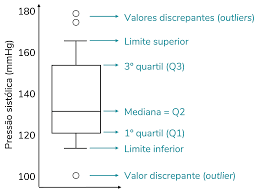

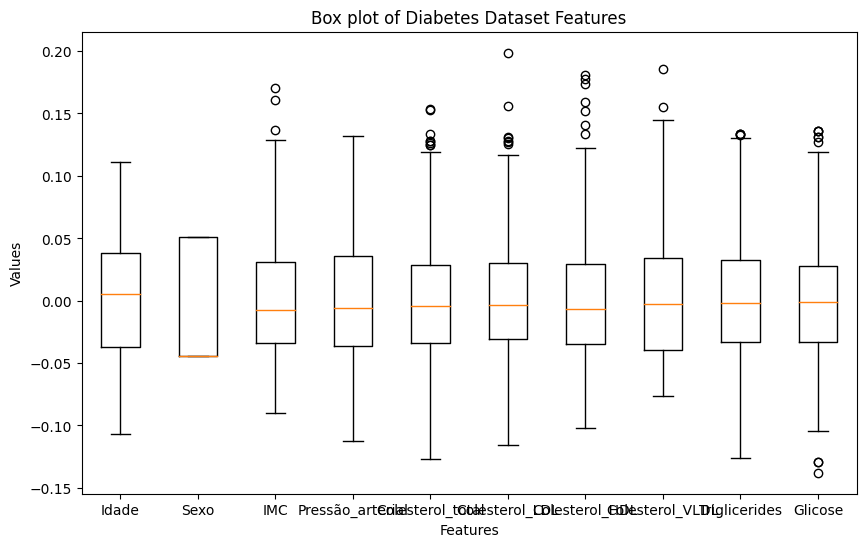

In [53]:
plt.figure(figsize=(10, 6))
plt.boxplot(diabetes_X, labels=diabetes_X.columns)
plt.title('Box plot of Diabetes Dataset Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

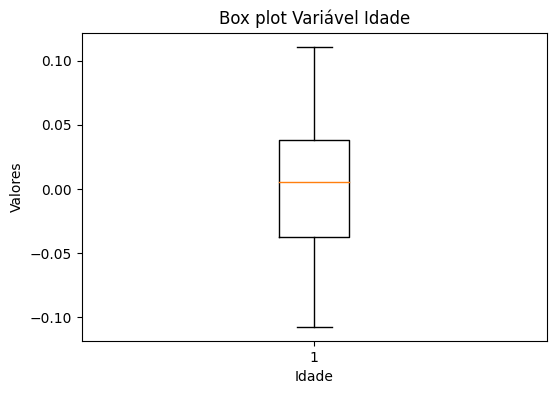

In [54]:
plt.figure(figsize=(6, 4))
plt.boxplot(diabetes_X.iloc[:, 0])
plt.title('Box plot Variável Idade')
plt.xlabel('Idade')
plt.ylabel('Valores')
plt.show()

In [55]:
corr = diabetes_X.corr()
corr

Idade      Sexo       IMC  Pressão_arterial  \
Idade             1.000000  0.173737  0.185085          0.335428   
Sexo              0.173737  1.000000  0.088161          0.241010   
IMC               0.185085  0.088161  1.000000          0.395411   
Pressão_arterial  0.335428  0.241010  0.395411          1.000000   
Colesterol_total  0.260061  0.035277  0.249777          0.242464   
Colesterol_LDL    0.219243  0.142637  0.261170          0.185548   
Colesterol_HDL   -0.075181 -0.379090 -0.366811         -0.178762   
Colesterol_VLDL   0.203841  0.332115  0.413807          0.257650   
Triglicerides     0.270774  0.149916  0.446157          0.393480   
Glicose           0.301731  0.208133  0.388680          0.390430   

                  Colesterol_total  Colesterol_LDL  Colesterol_HDL  \
Idade                     0.260061        0.219243       -0.075181   
Sexo                      0.035277        0.142637       -0.379090   
IMC                       0.249777        0.261170       -0.366811   
Pressão_arterial          0.242464        0.185548       -0.178762   
Colesterol_total          1.000000        0.896663        0.051519   
Colesterol_LDL            0.896663        1.000000       -0.196455   
Colesterol_HDL            0.051519       -0.196455        1.000000   
Colesterol_VLDL           0.542207        0.659817       -0.738493   
Triglicerides             0.515503        0.318357       -0.398577   
Glicose                   0.325717        0.290600       -0.273697   

                  Colesterol_VLDL  Triglicerides   Glicose  
Idade                    0.203841       0.270774  0.301731  
Sexo                     0.332115       0.149916  0.208133  
IMC                      0.413807       0.446157  0.388680  
Pressão_arterial         0.257650       0.393480  0.390430  
Colesterol_total         0.542207       0.515503  0.325717  
Colesterol_LDL           0.659817       0.318357  0.290600  
Colesterol_HDL          -0.738493      -0.398577 -0.273697  
Colesterol_VLDL          1.000000       0.617859  0.417212  
Triglicerides            0.617859       1.000000  0.464669  
Glicose                  0.417212       0.464669  1.000000

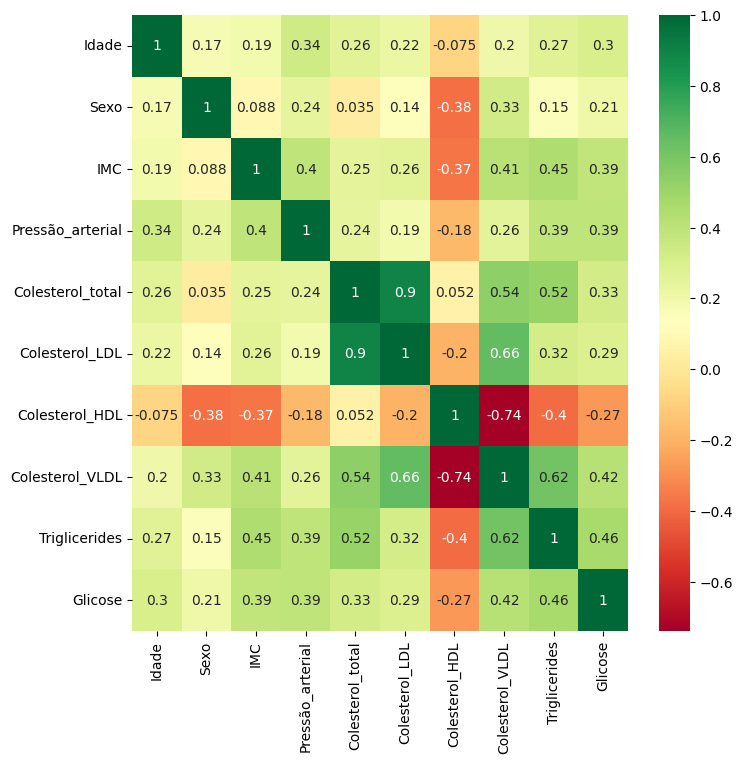

In [56]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

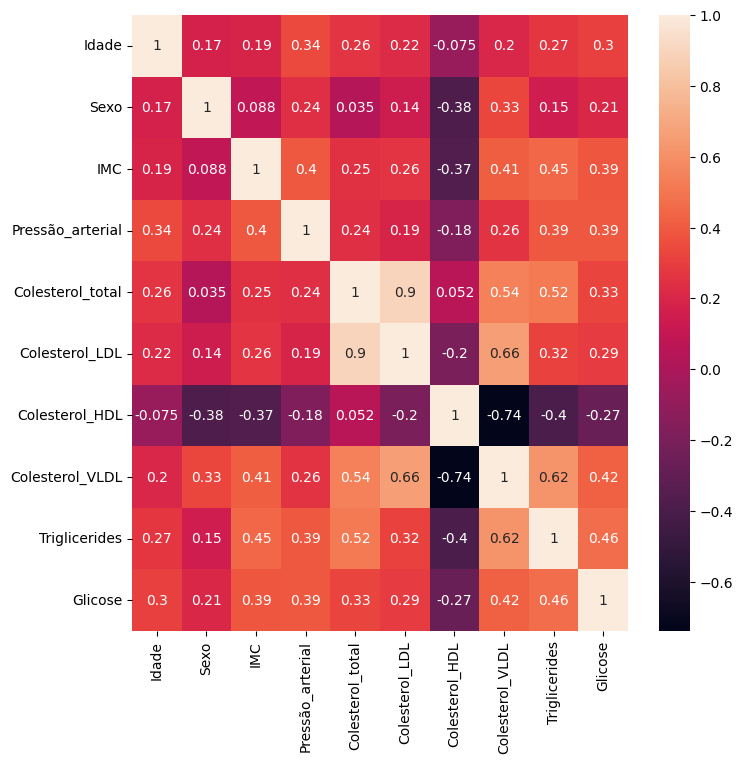

In [57]:
corr_var = diabetes_X.corr(method ='pearson')

plt.subplots(figsize=(8,8))
sns.heatmap(corr_var,annot=True)
plt.show()

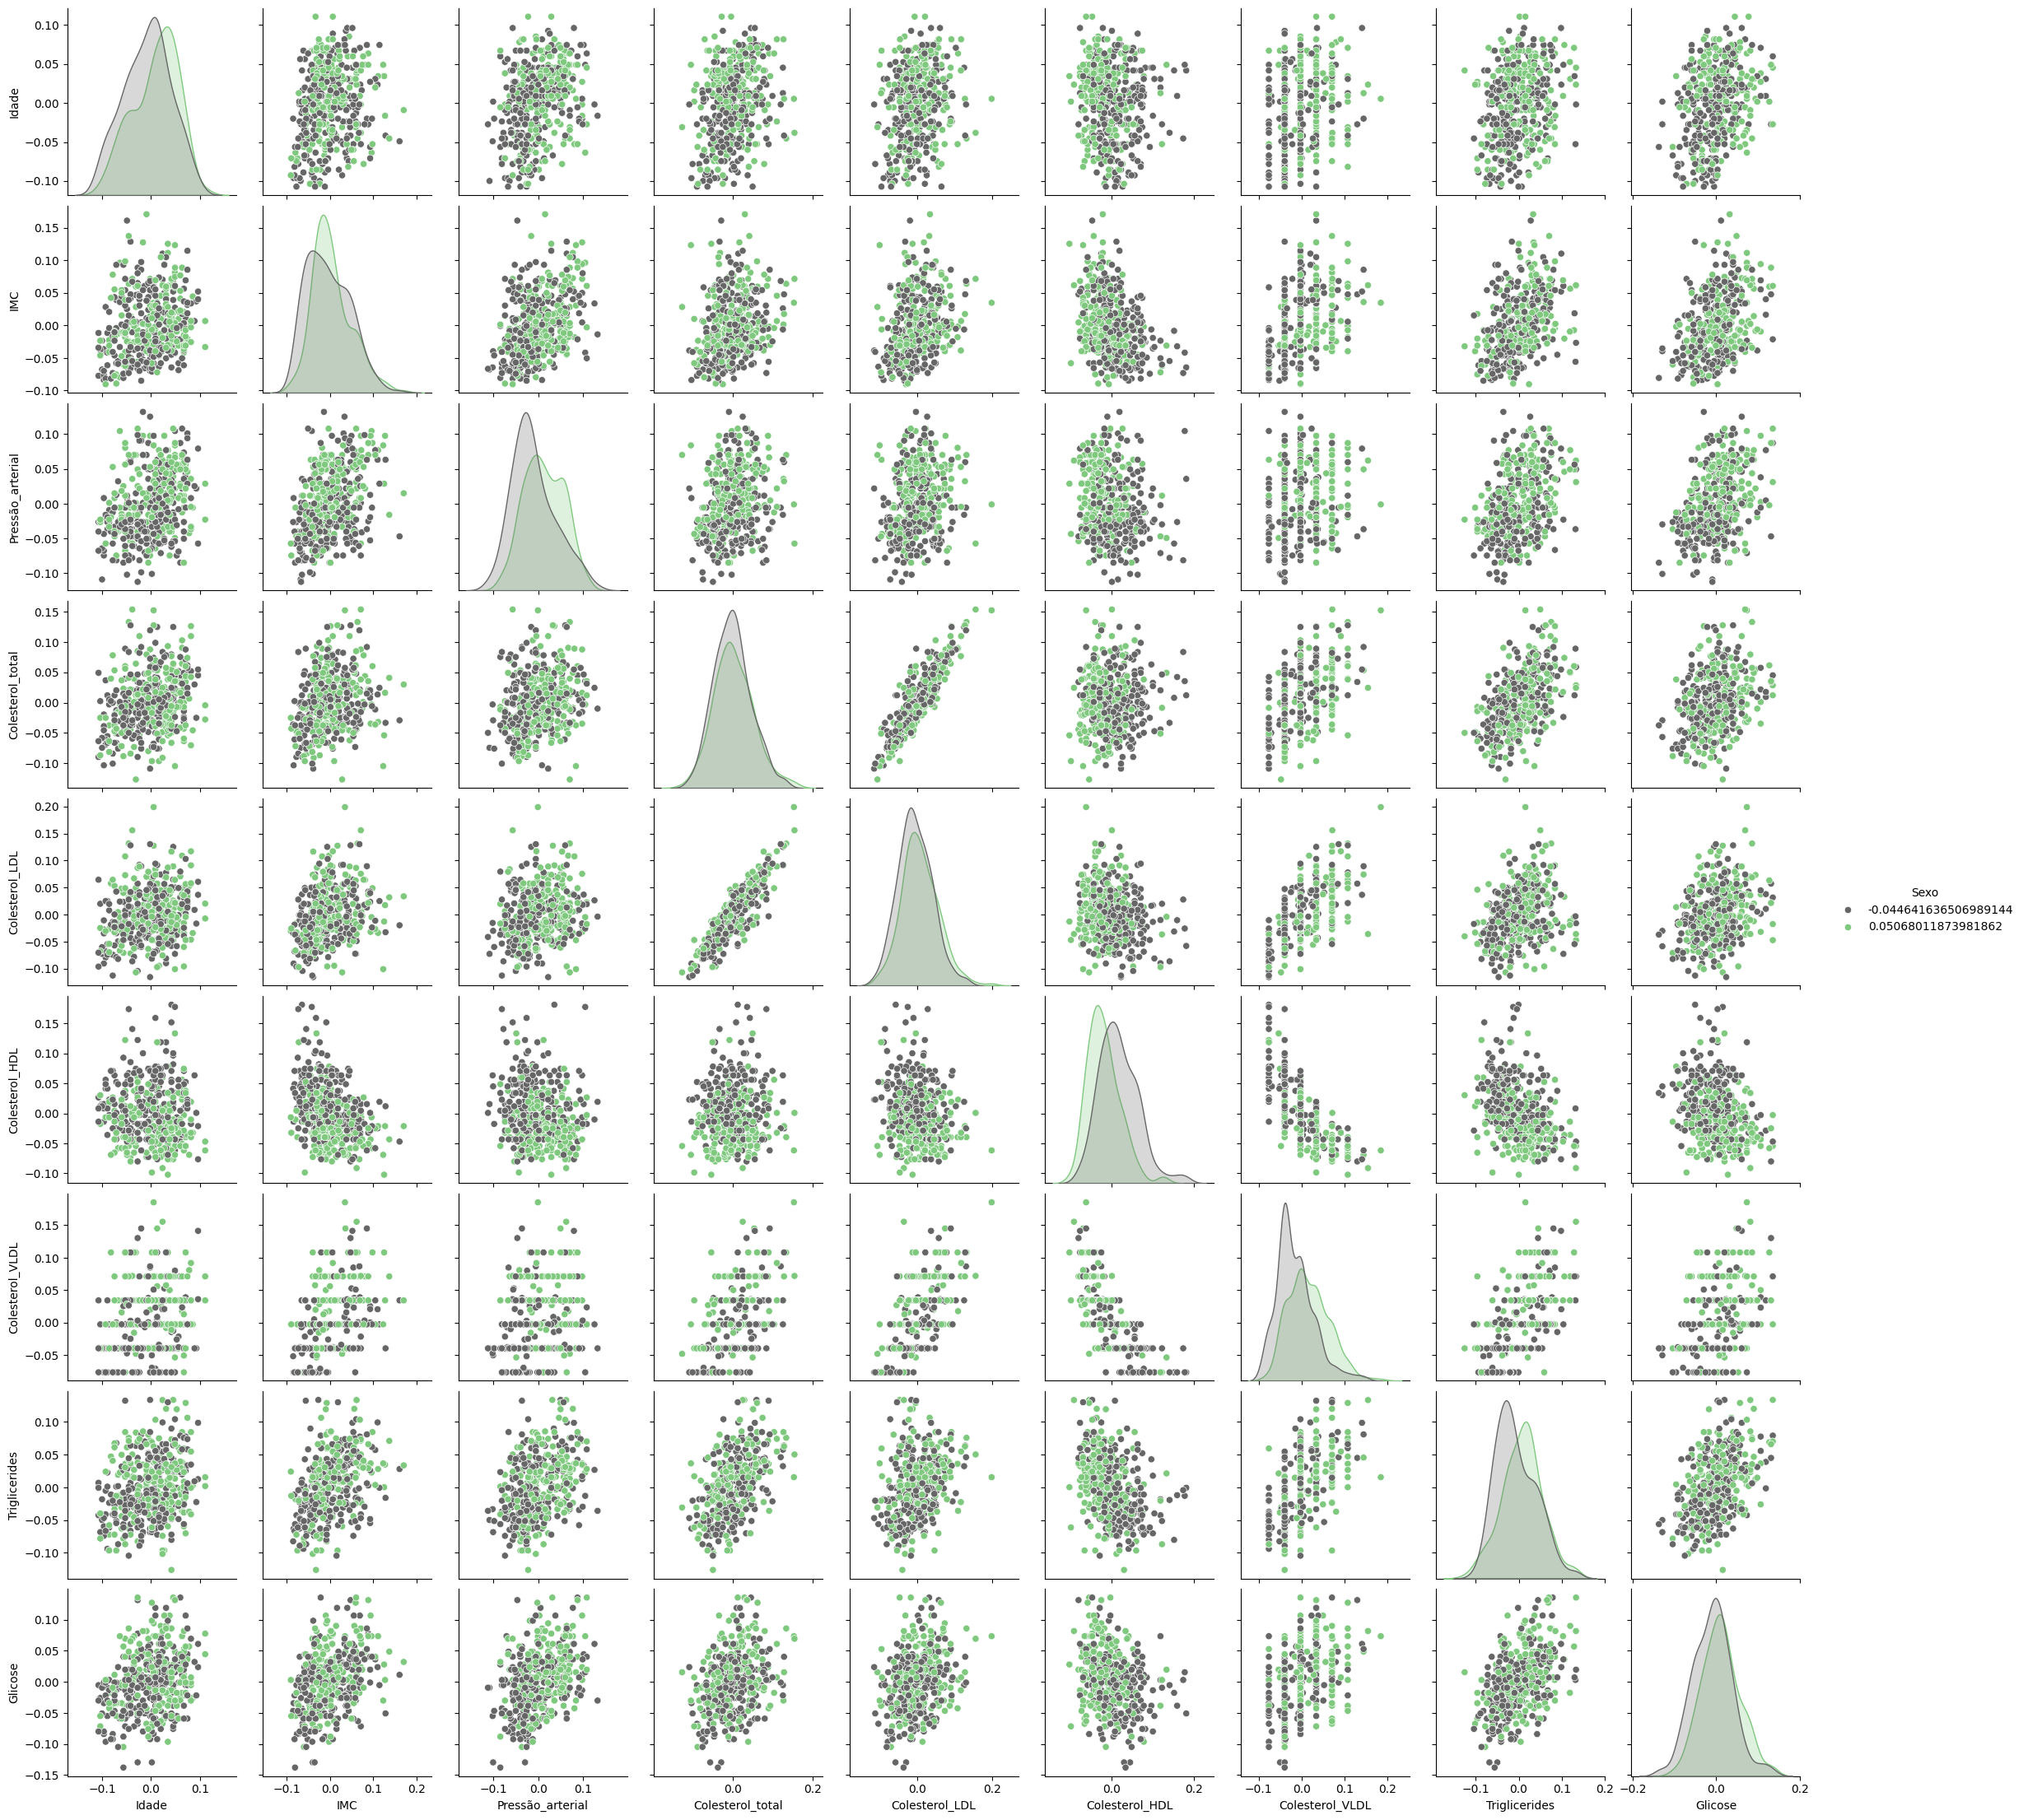

In [58]:
sns.pairplot(diabetes_X,hue="Sexo", palette=random.choice(pallete))

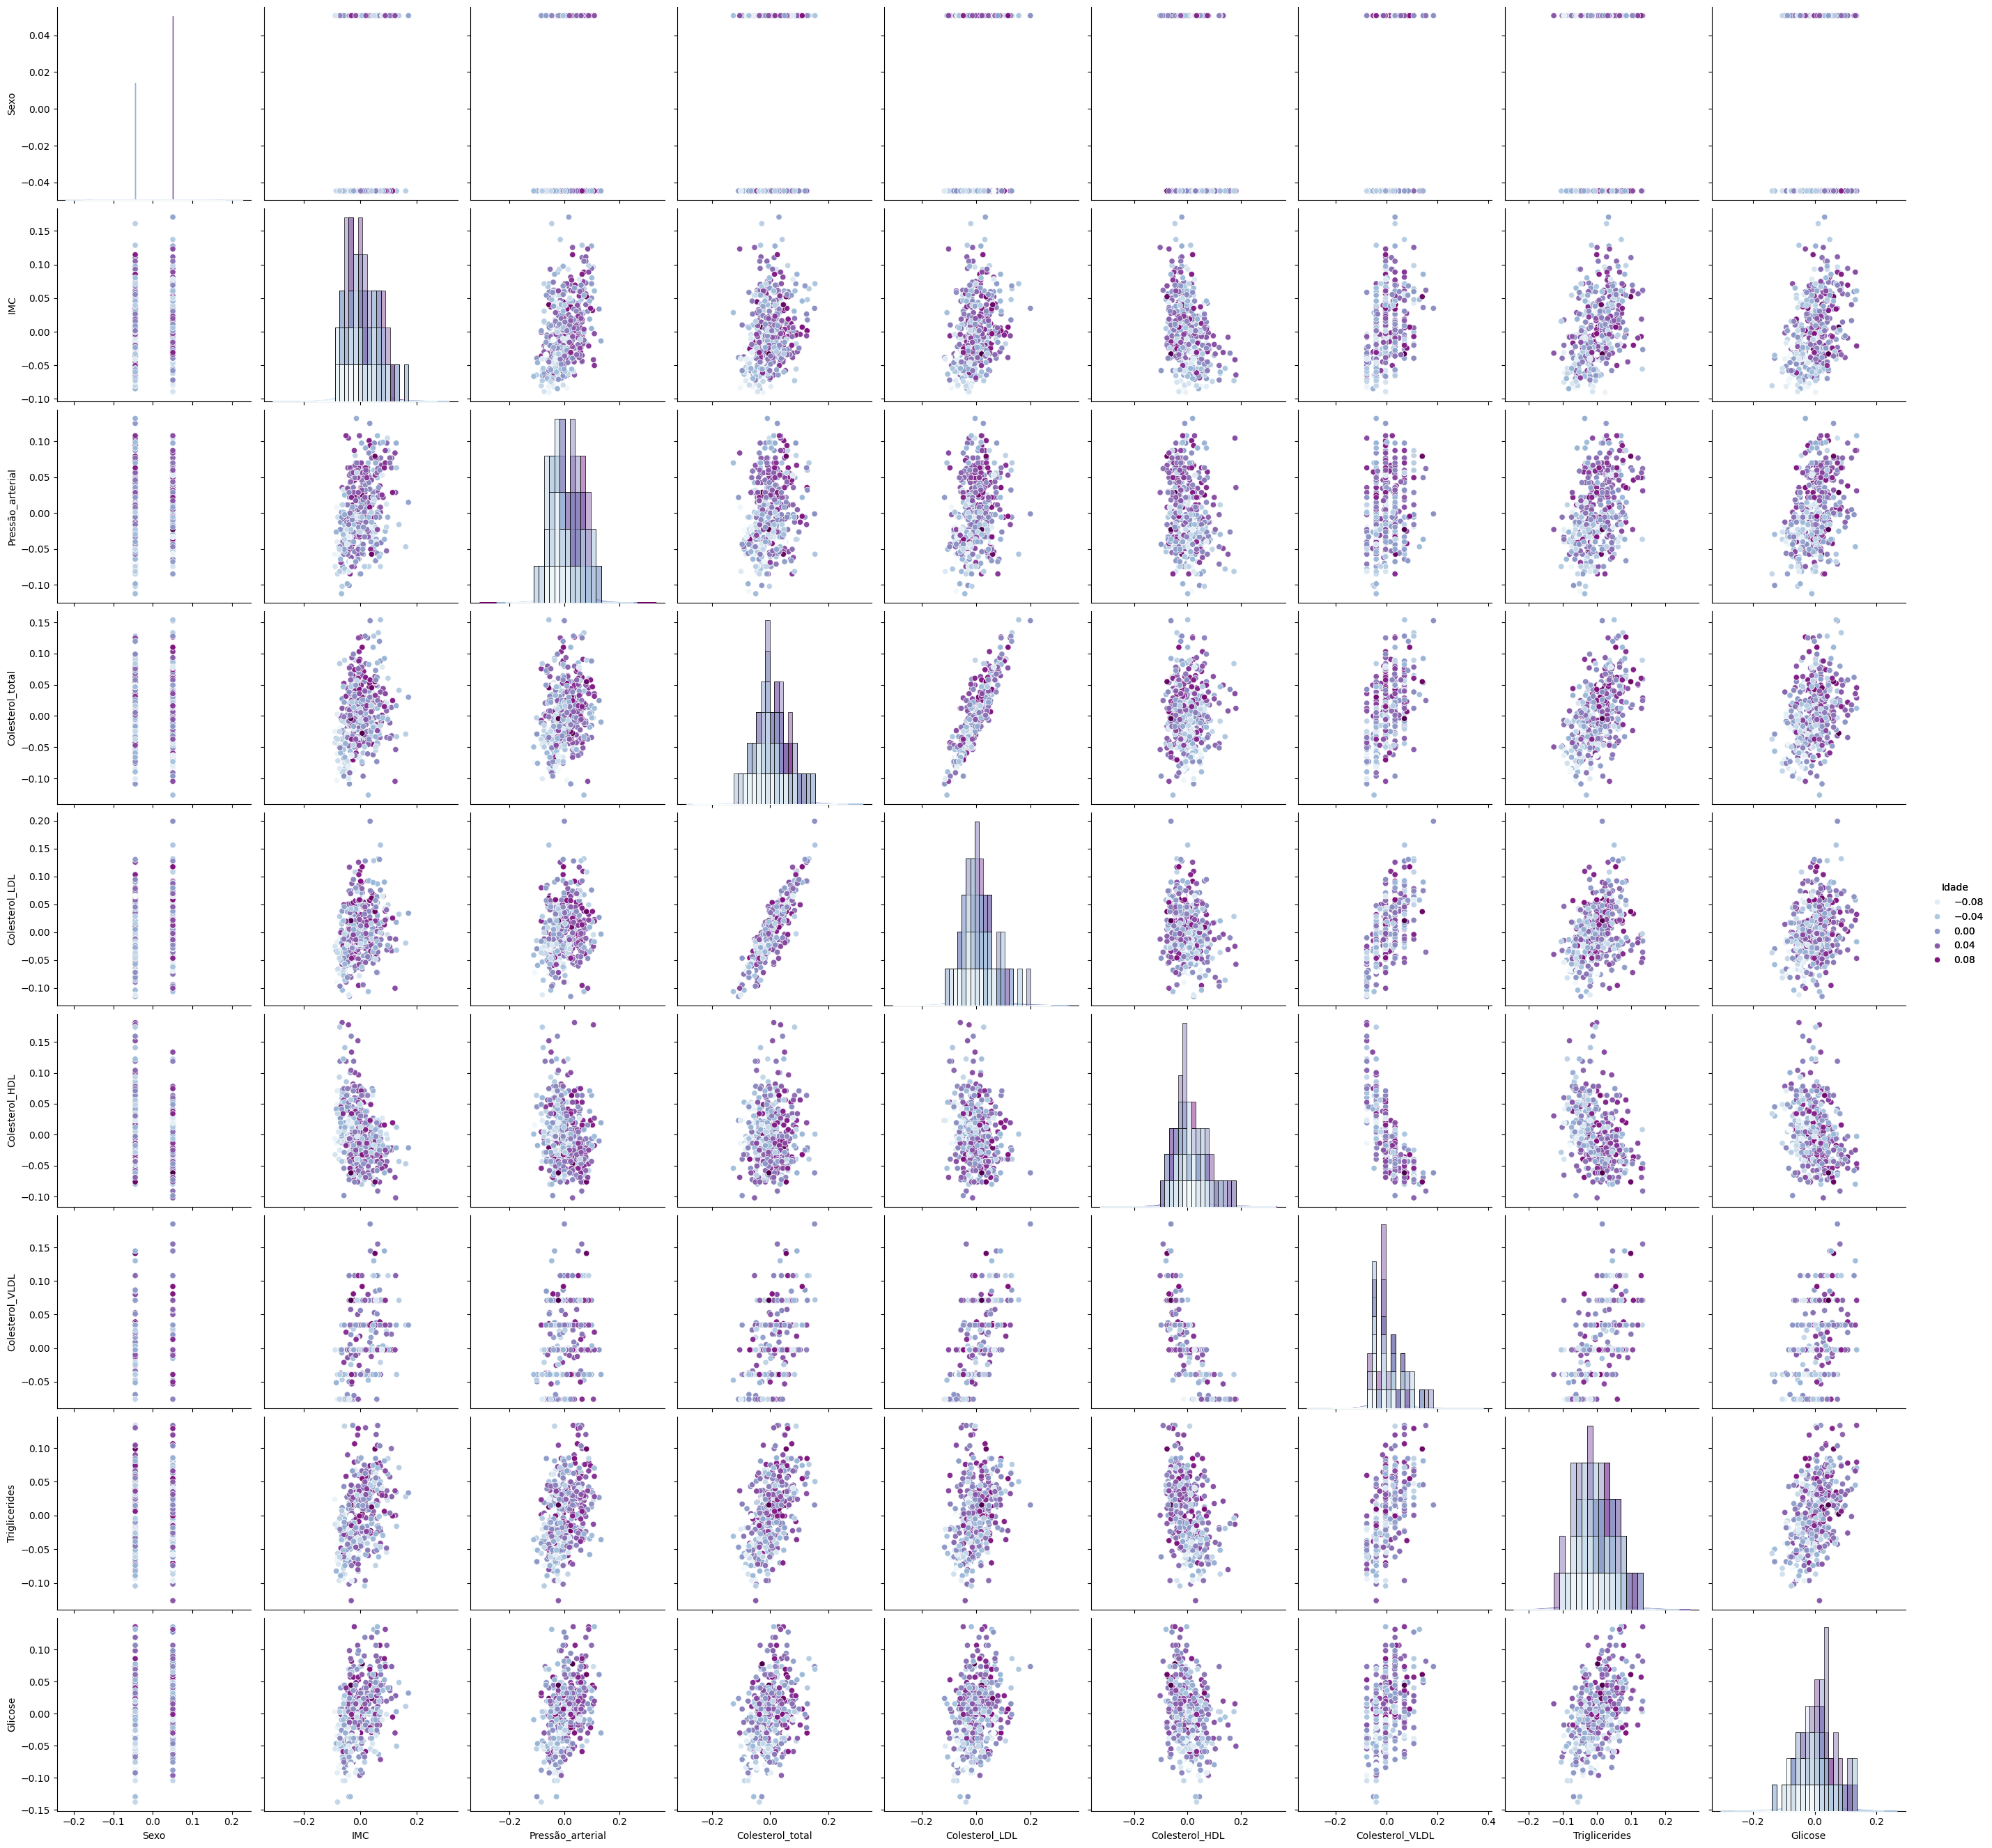

In [59]:
g = sns.pairplot(diabetes_X, hue = "Idade", height = 3, palette=random.choice(pallete))
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

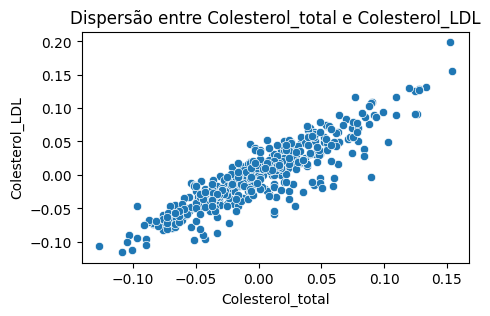

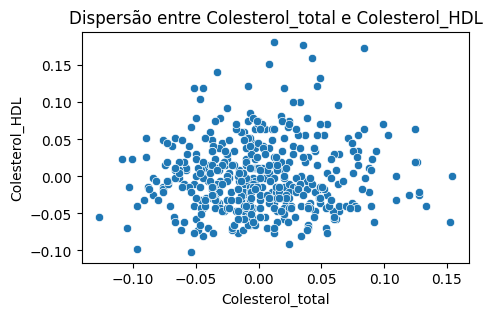

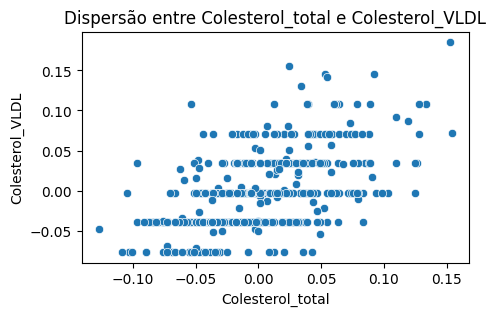

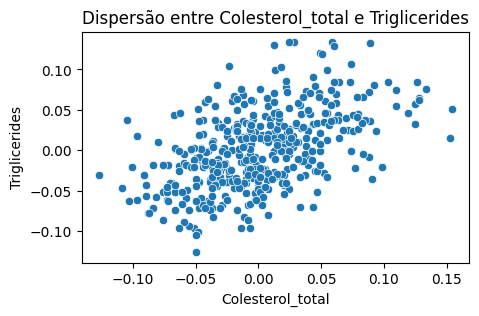

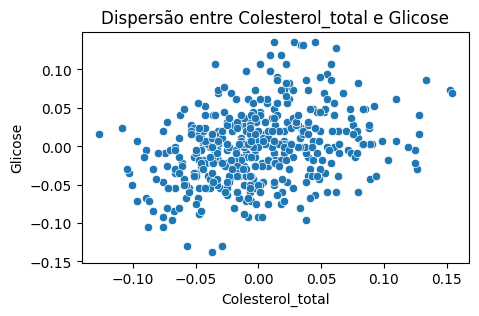

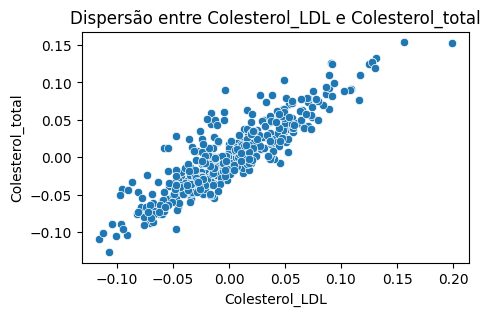

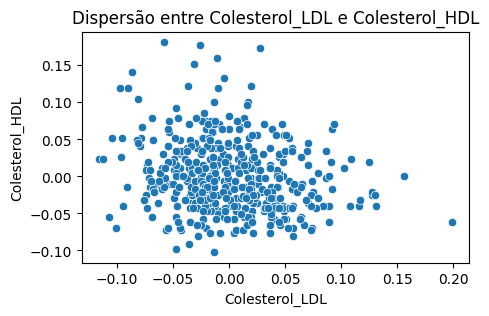

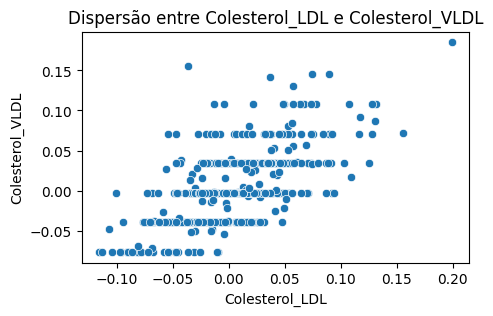

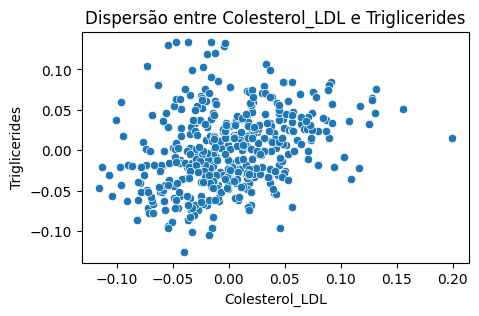

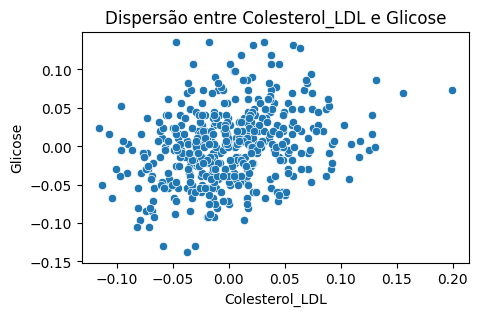

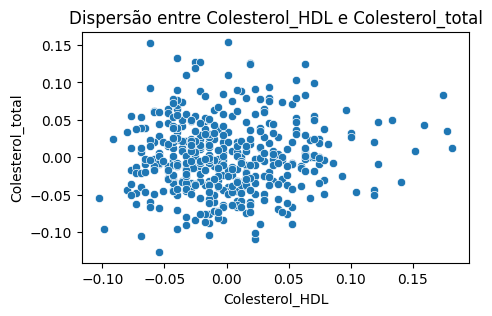

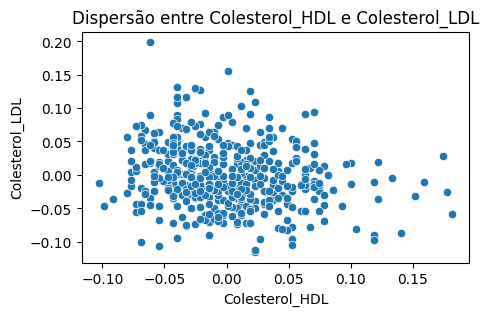

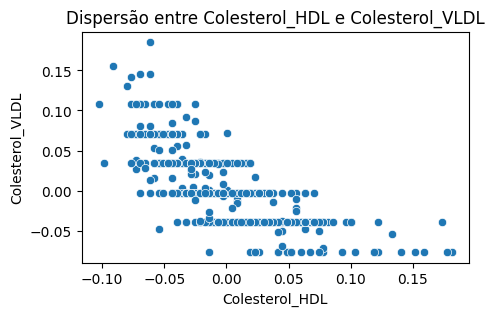

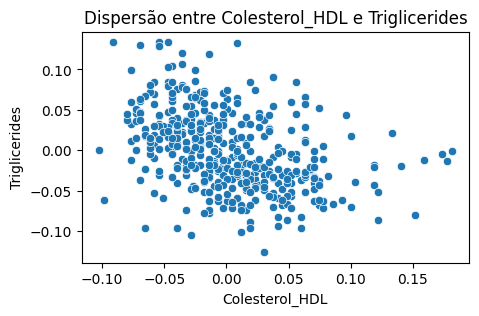

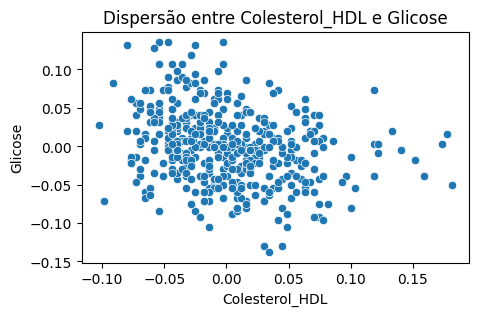

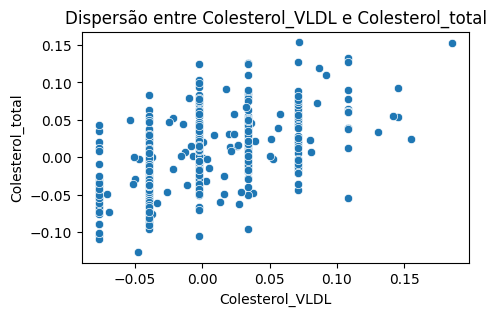

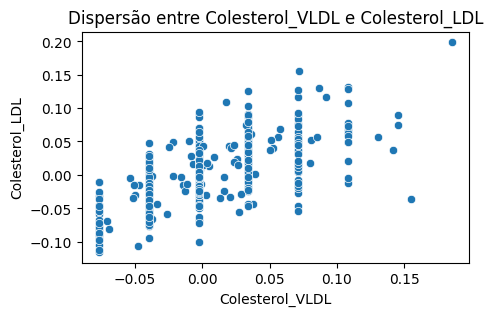

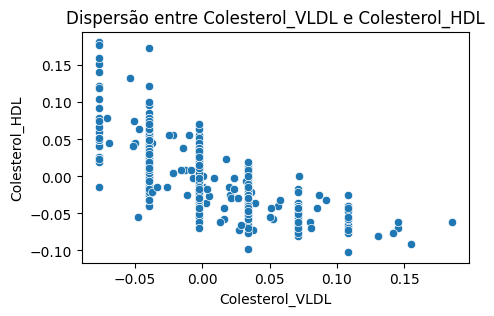

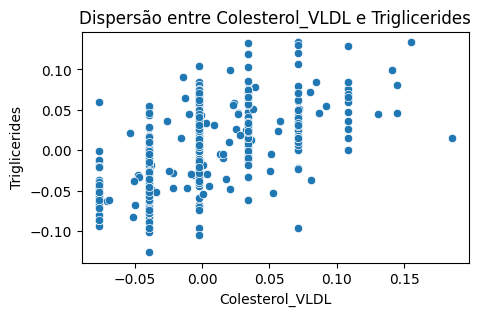

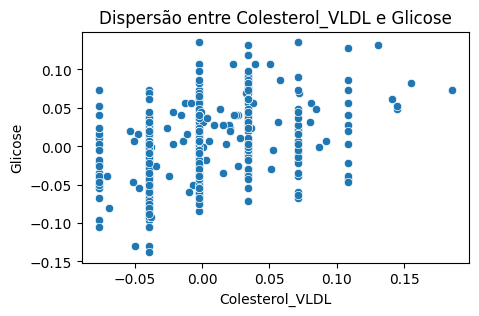

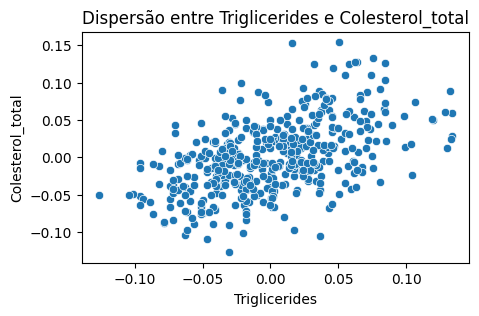

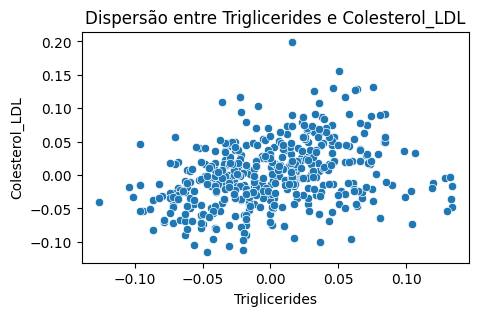

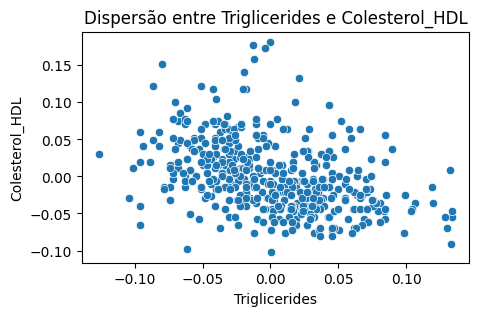

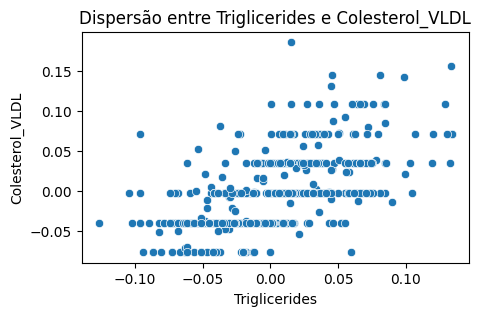

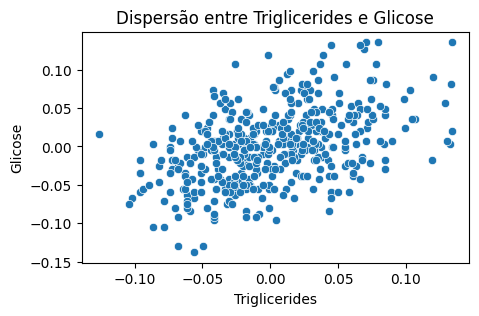

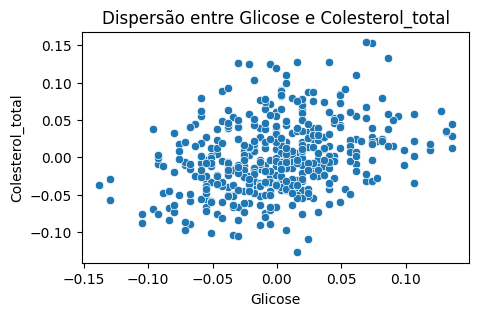

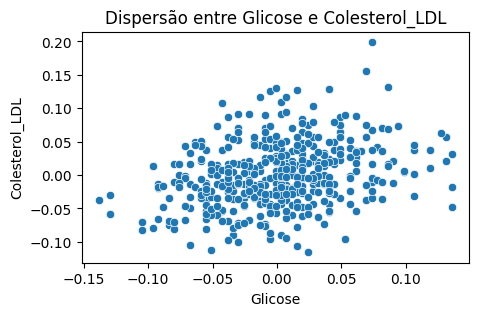

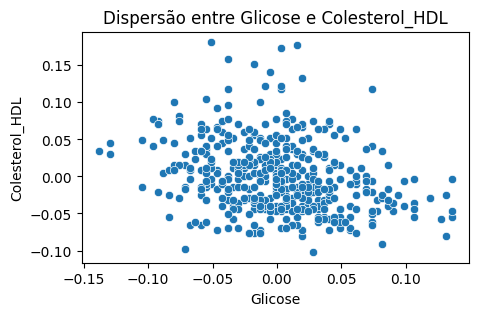

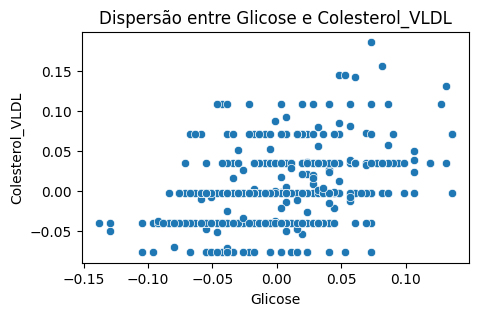

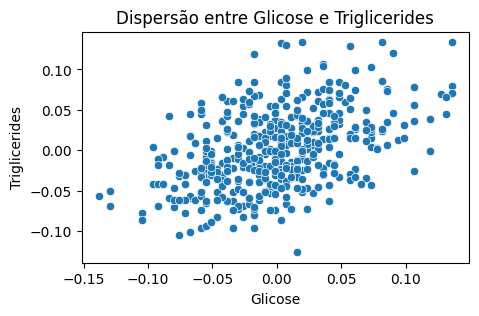

In [60]:
# # Criar DataFrame pandas com os dados e rótulos
# diabetes = pd.DataFrame(data=np.c_[diabetes_X, diabetes_y])

# Análise de dispersão entre variáveis de colesterol, glicose e triglicerides
colesterol_glicose_triglicerides = ["Colesterol_total","Colesterol_LDL","Colesterol_HDL","Colesterol_VLDL","Triglicerides","Glicose"]

for i, feature1 in enumerate(colesterol_glicose_triglicerides):
    for j, feature2 in enumerate(colesterol_glicose_triglicerides):
        if i != j:
            plt.figure(figsize=(5, 3))

            # Gráfico de dispersão
            sns.scatterplot(data=diabetes_X, x=feature1, y=feature2)
            plt.title(f'Dispersão entre {feature1} e {feature2}')
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.show()

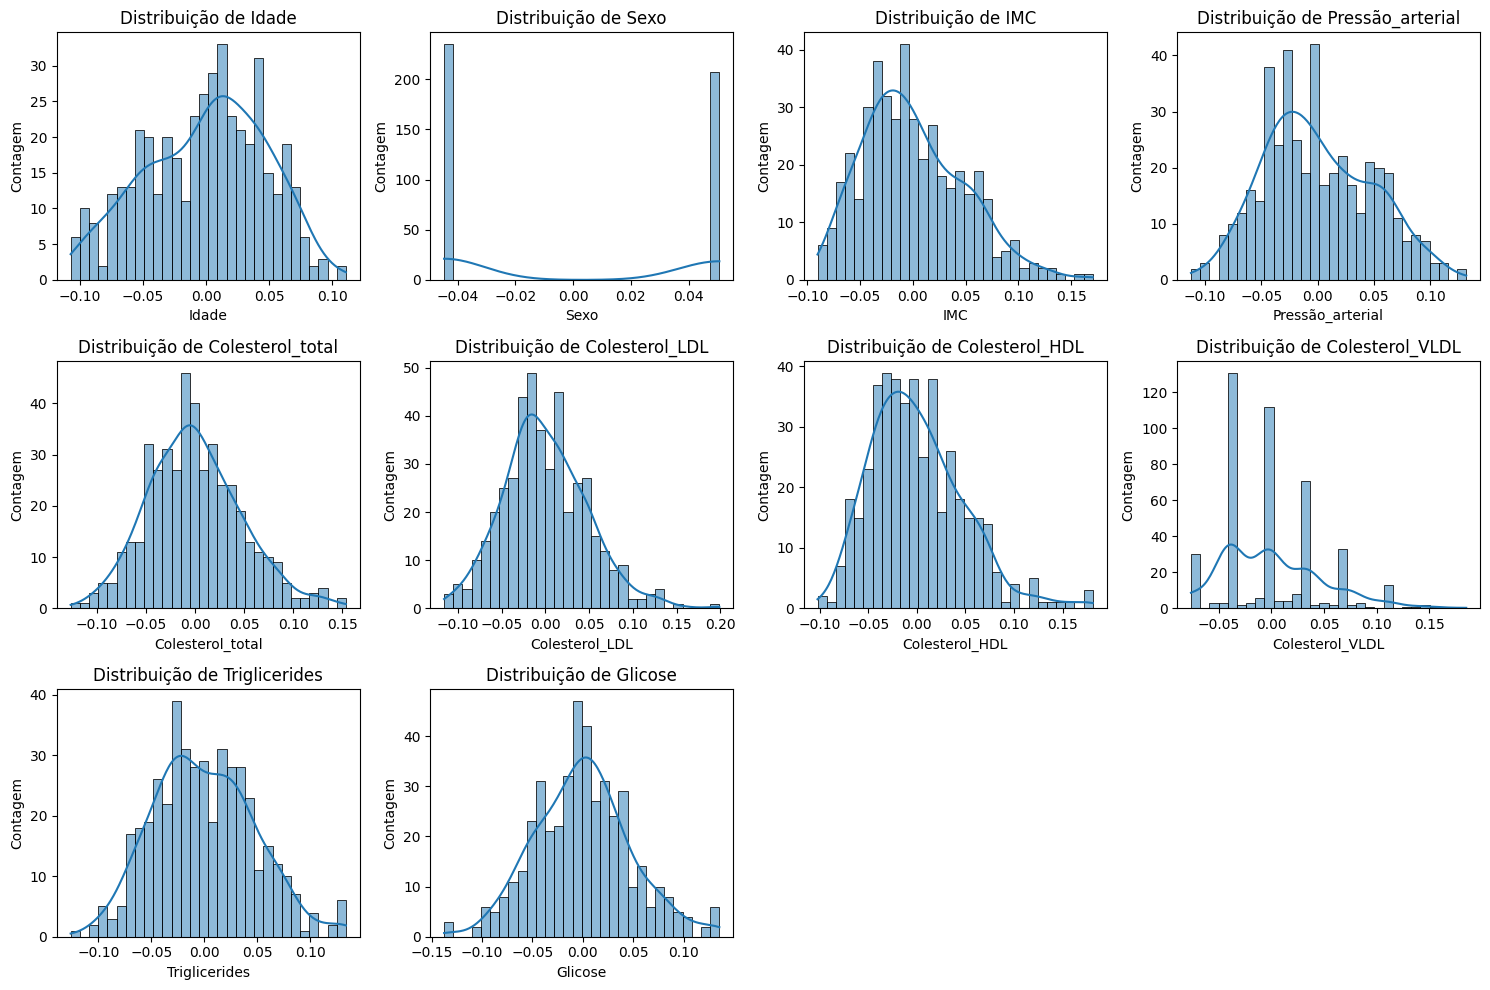

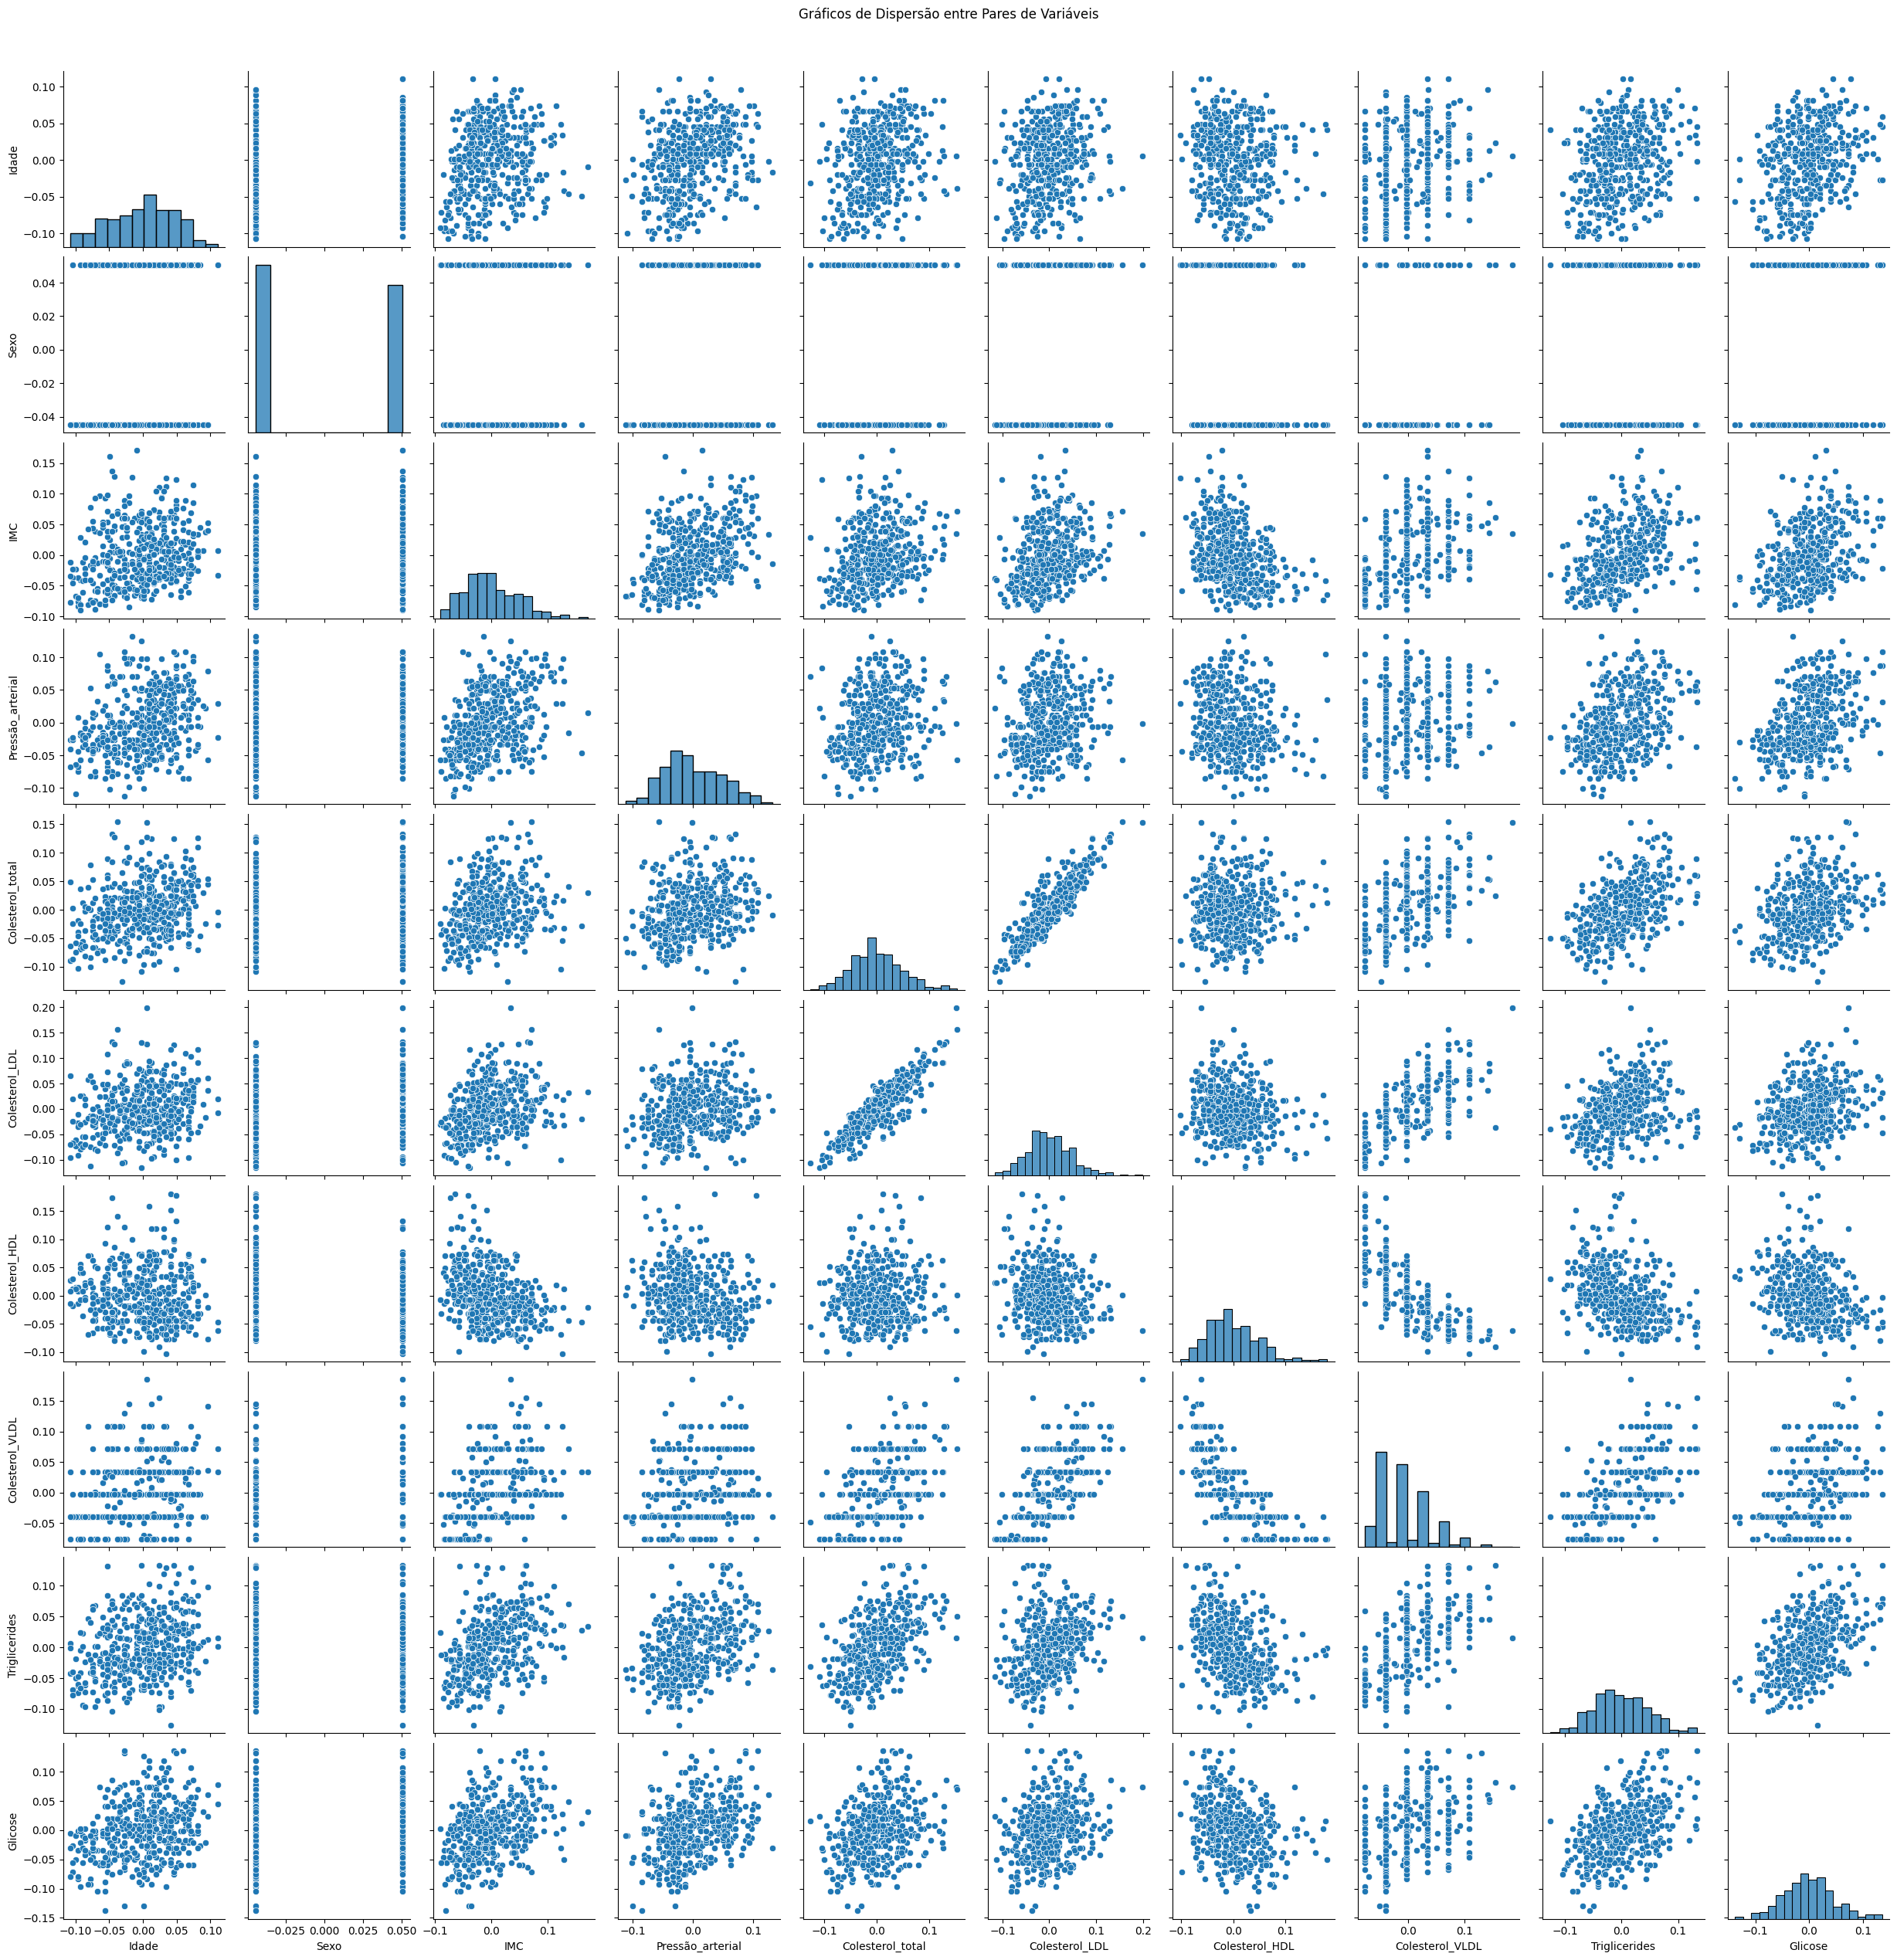

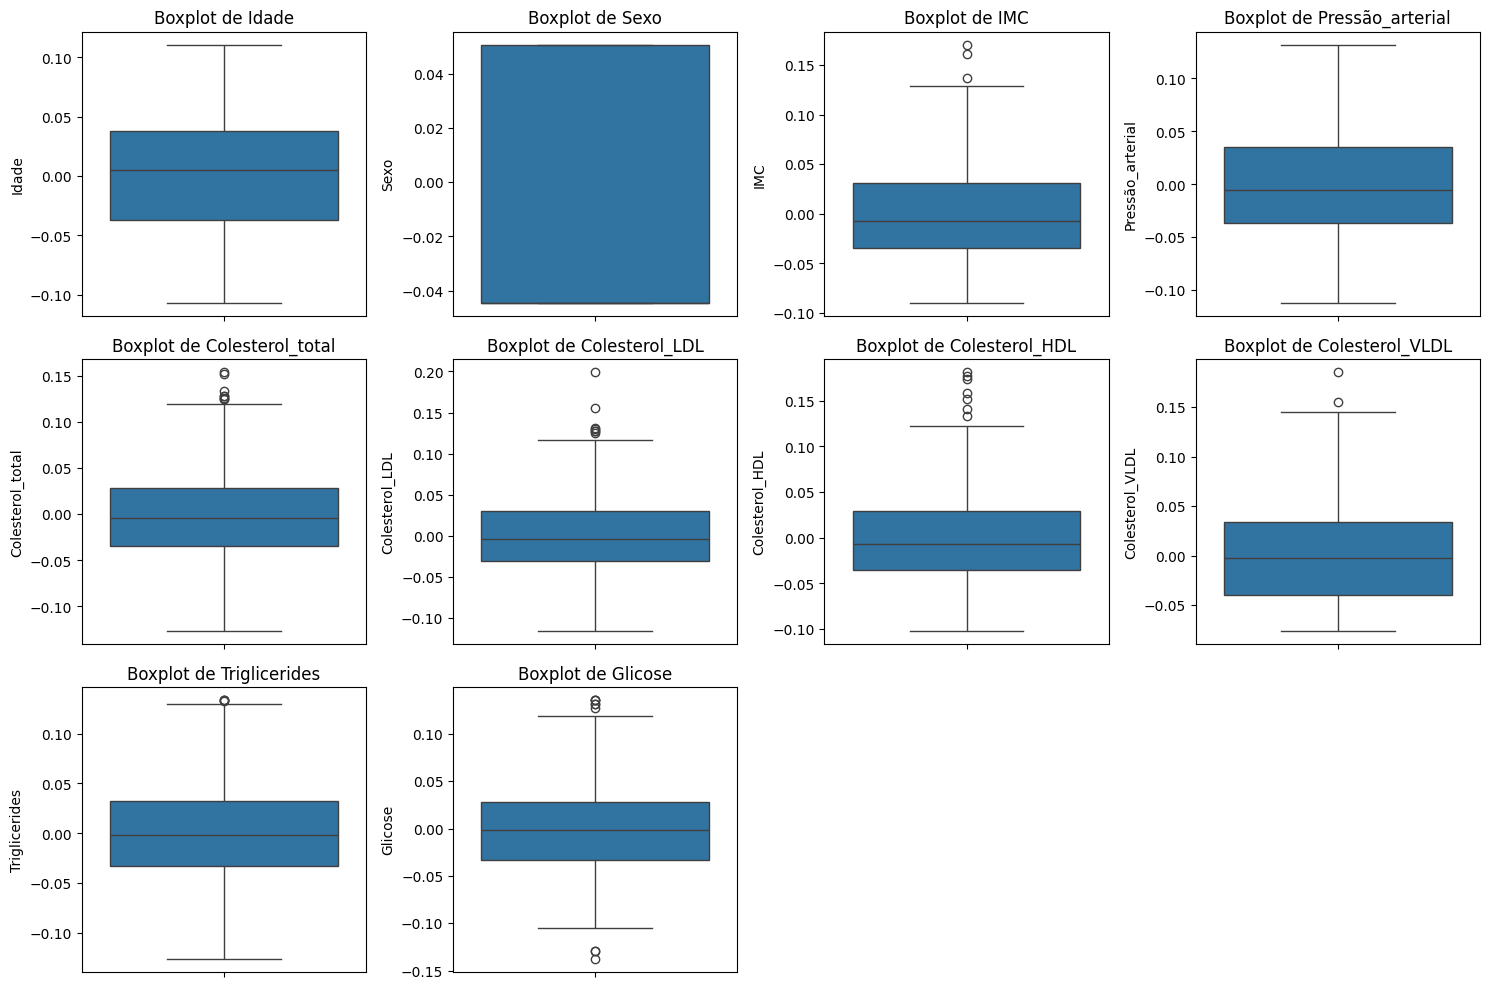

In [61]:
# Visualizar a distribuição de todas as variáveis preditoras
plt.figure(figsize=(15, 10))
for i, feature in enumerate(diabetes_X.columns):  # Não incluir a última coluna (target)
    plt.subplot(3, 4, i + 1)
    sns.histplot(data=diabetes_X, x=feature, bins=30, kde=True)
    plt.title(f'Distribuição de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

# Visualizar gráficos de dispersão entre pares de variáveis
sns.pairplot(diabetes_X)
plt.suptitle("Gráficos de Dispersão entre Pares de Variáveis", y=1.02)
plt.show()

# Visualizar boxplots para cada variável preditora
plt.figure(figsize=(15, 10))
for i, feature in enumerate(diabetes_X.columns):  # Não incluir a última coluna (target)
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=diabetes_X, y=feature)
    plt.title(f'Boxplot de {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [62]:
variaveis_quantitativas = list(diabetes_X.columns)

# Análise estatística das variáveis quantitativas
for feature in variaveis_quantitativas:
    print(f"Análise estatística de {feature}:")
    print(f"Média: {diabetes_X[feature].mean()}")
    print(f"Mediana: {diabetes_X[feature].median()}")
    print(f"Desvio Padrão: {diabetes_X[feature].std()}")
    print(f"1º Quartil (Q1): {diabetes_X[feature].quantile(0.25)}")
    print(f"3º Quartil (Q3): {diabetes_X[feature].quantile(0.75)}")
    print("\n")

Análise estatística de Idade:
Média: -2.511816797794472e-19
Mediana: 0.005383060374248237
Desvio Padrão: 0.047619047619047644
1º Quartil (Q1): -0.03729926642522996
3º Quartil (Q3): 0.038075906433423026


Análise estatística de Sexo:
Média: 1.2307902309192911e-17
Mediana: -0.044641636506989144
Desvio Padrão: 0.047619047619047665
1º Quartil (Q1): -0.044641636506989144
3º Quartil (Q3): 0.05068011873981862


Análise estatística de IMC:
Média: -2.2455642172282577e-16
Mediana: -0.007283766209687899
Desvio Padrão: 0.047619047619047616
1º Quartil (Q1): -0.03422906805670789
3º Quartil (Q3): 0.031248015431550695


Análise estatística de Pressão_arterial:
Média: -4.7975700837874414e-17
Mediana: -0.00567042229275739
Desvio Padrão: 0.047619047619047596
1º Quartil (Q1): -0.03665608107540074
3º Quartil (Q3): 0.03564378941743375


Análise estatística de Colesterol_total:
Média: -1.3814992387869595e-17
Mediana: -0.004320865536613489
Desvio Padrão: 0.04761904761904759
1º Quartil (Q1): -0.034247840202487